<center><font size="6"><b>Комп'ютерний практикум 7.

<center><b> Кластеризація текстової інформації </font>





<center><img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*7j6tM_xSGCAwuB-fx6-N3w.jpeg" width="600"></center>

>__Навчання без вчителя (Unsupervised learning)__ - це напрямок машинного навчання, що об'єднує алгоритми і методи побудови моделей на основі опису множини об'єктів (навчальної вибірки) та необхідності знайти внутрішні взаємозв'язки, залежності, закономірності, що існують між об'єктами.

> В алгоритмах навчання без вчителя помилка моделі на множині для навчання не обраховується. Замість помилки використовується інформація про поточний стан параметрів моделі та прикладів навчальної множини.
_Типи вхідних даних__

* _<u>Опис об'єктів за ознаками.</u>_ Кожен об'єкт описується набором своїх характеристик - ознаками, які можуть бути числовими або категоріальними.

* _<u>Матриця відстаней між об'єктами.</u>_ Кожен об'єкт описується відстанню до інших об'єктів навчальної вибірки.

__Типи задач__
* Кластеризація
* Пошук асоціативних правил
* Поповнення пропущених значень
* Скорочення розмірності
* Візуалізація даних

>___Задачі кластеризації___

<center><img src="https://metana.io/wp-content/uploads/2023/08/uL-1024x512.png" width="400"></center>

Вибірка об'єктів розбивається на неперетинні підмножини - кластери за схожістю об'єктів в одному кластрі. Вихідна інформація подається у вигляді матриці відстаней.

__Методи кластеризації__
* Графові алгоритми
* Статистичні алгоритми
* Ієрархічні алгоритми
* Нейронна мережа Кохонена


>___Задачі пошуку правил асоціації___

<center><img src="https://eastgate-software.com/wp-content/uploads/2023/10/Unsupervised-Learning-Association.png" width="400"></center>

Вихідна інформація подається у вигляді опису характеристик об'єктів. Необхідно знайти такі набори ознак і такі значення цих ознак, які досить часто (невипадково) зустрічаються в описі характеристик об'єктів.

__Методи__
* Аналіз ринкових кошиків
* Apriori

>___Задача поповнення пропущених даних___

<center><img src="https://thepracticaldev.s3.amazonaws.com/i/egr5hnuazl4rz5mi4llw.jpg" width="400"></center>


Вихідна інформація подається у вигляді опису характеристик об'єктів. Значення деяких характеристик можуть бути відсутніми. Для поповнення таких значень вважають даний об'єкт цільовим, будують алгоритм, який прогнозує його значення в залежності від інших ознак. Пропущені значення заповнюють прогнозами.

__Методи__

Якщо ознака кількісна, застосовується регресійний аналіз, якщо категоріальна - методи класифікації.

>___Задачі скорочення розмірності___

<center><img src="https://miro.medium.com/max/1192/1*vXQ5sgMF0XmiY4Jc6gJVwA.png" width="600"></center>

Вихідна інформація подається у вигляді опису характеристик об'єктів, причому число ознак (факторів) може бути достатньо великим. Задача полягая у відображенні цих даних в простір меншої розмірності з мінімальною втратою інформації.

__Методы__
* Метод головних компонент (PCA)
* Метод незалежних компонент
* Лінійний дискримінантний аналіз (LDA)

>___Задачі візуалізації даних___

<center><img src="https://thumbs.dreamstime.com/z/abstract-d-big-data-visualization-concept-clustering-infographics-design-cluster-analysis-vector-illustration-188989840.jpg" width="300"></center>


Деякі методи кластеризації та пониження розмірності будують представлення вибірки в просторі розмірності два, що дозволяє відображати багатовимірні дані у вигляді плоских графіків та аналізувати їх візуально, що покращує розуміння суті задачі.

__Методи__

* Дендрограма
* Карта Кохонена
* Карта схожості






In [1]:
# Встановлюємо необхідні пакети
! pip install pyspark
! pip install findspark
! pip install pyarrow

In [2]:
# імпорт допоміжної бібліотеки для організації правильного шляху до Spark
import findspark
findspark.init()

In [3]:
#імпорт бібліотек та модулів

import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [4]:
# Створення spark session

spark = SparkSession \
    .builder \
    .appName("My_Spark_Text_Сlassification_2") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g")\
    .config("spark.executor.cores", "4") \
    .config("spark.sql.shuffle.partitions", "200") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .config("spark.sql.autoBroadcastJoinThreshold", "-1")\
    .config("spark.driver.maxResultSize", "4g") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/07 09:26:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
# Використаємо `read_csv` з pandas для завантаження датасету
df = pd.read_csv('data/Covid_text.csv', encoding='latin-1')


Датасет охоплює множину повідомлень Tweeter, що стосуються Covid-19 з різними настроями:
- Extremely Negative
- Negative
- Neutral
- Positive
- Extremely Positive

In [7]:
# Перегляд датасету
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We canÂt stop #COVID19 without pro...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [8]:
unique_values = df['Sentiment'].unique()
print("Унікальні значення:", unique_values)

Унікальні значення: ['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']


In [9]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [10]:
# Оберемо два стовпчика з техстом та настороями (класами)
df= df[['OriginalTweet', 'Sentiment']]
df.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  44955 non-null  object
 1   Sentiment      44955 non-null  object
dtypes: object(2)
memory usage: 702.5+ KB


In [12]:
#завантажимо дані в spark dataframe
tdf = spark.createDataFrame(df)

In [13]:
#виведемо dataframe на екран
tdf.show()

24/12/07 09:29:42 WARN TaskSetManager: Stage 0 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+------------------+
|       OriginalTweet|         Sentiment|
+--------------------+------------------+
|TRENDING: New Yor...|Extremely Negative|
|When I couldn't f...|          Positive|
|Find out how you ...|Extremely Positive|
|#Panic buying hit...|          Negative|
|#toiletpaper #dun...|           Neutral|
|Do you remember t...|           Neutral|
|Voting in the age...|          Positive|
|@DrTedros "We can...|           Neutral|
|HI TWITTER! I am ...|Extremely Negative|
|Anyone been in a ...|Extremely Positive|
|Best quality couc...|          Positive|
|Beware of counter...|Extremely Negative|
|Panic food buying...|Extremely Negative|
|#Covid_19 Went to...|Extremely Positive|
|While we were bus...|          Positive|
|#AirSewa  @flyspi...|Extremely Negative|
|What Precautionar...|Extremely Positive|
|When youÂre stoc...|           Neutral|
|That's about a we...|          Positive|
|Studies show the ...|Extremely Positive|
+--------------------+------------

## **Підготовка даних**
Підготовка даних до моделювання виконується  у декілька кроків (__Model Pipeline__)

У PySpark `Pipeline` — це об’єкт, що поєднує кілька етапів обробки.

- regexTokenizer: Токенізація
- stopwordsRemover: Видалення стоп-слів
- countVectors: Векторизація

### Переваги Model Pipeline:
- **Автоматизація та відтворюваність**: спрощує запуск задач, особливо при великих обсягах даних.
- **Масштабованість**: легкість інтеграції нових даних або оновлення існуючих етапів.
- **Управління ресурсами**: дозволяє ефективно розподіляти обчислювальні ресурси для різних етапів.


Функція `StopWordsRemover` у PySpark зазвичай використовується для видалення стандартних слів-стопів (наприклад, "the", "is", "and"). Однак вона не підходить для видалення URL-адрес та інших службових символів, оскільки URL-адреси не є стандартними словами.

---

Для видалення URL-адрес найкраще попередньо обробити текст за допомогою регулярних виразів. У PySpark це можна зробити за допомогою функції `regexp_replace` з модуля `pyspark.sql.functions`.

---

#### Код для видалення URL-адрес:

```python
from pyspark.sql import functions as F

# Видалення URL-адрес із тексту
tdf = tdf.withColumn(
    'Text',
    F.regexp_replace(F.col('Text'), r'http\S+', '')  # Видалити всі рядки, що починаються з "http"
)
```

---

1. **`regexp_replace`**:
   - Це функція для заміни тексту, яка працює з регулярними виразами.
2. **`r'http\S+'`**:
   - Це регулярний вираз, який шукає всі слова, що починаються з `http` і включають інші символи, доки не зустрінеться пробіл.
   - `\S+` — це набір символів, що означає "будь-який непорожній текст".
3. **`''`**:
   - URL-адреса буде замінена на порожній рядок.

---


In [14]:
from pyspark.sql import functions as F

In [15]:
# Видалення URL-адрес із тексту
tdf = tdf.withColumn(
    'OriginalTweet',
    F.regexp_replace(F.col('OriginalTweet'), r'http\S+', '')  # Видалити всі рядки, що починаються з "http"
)

Для видалення HTML-тегів із тексту в PySpark можна використовувати регулярні вирази (`regexp_replace`). HTML-теги мають формат `<tag>...</tag>` або `<tag ... />`, що легко розпізнається за допомогою регулярок.

---

### Код для видалення HTML-тегів:
```python
from pyspark.sql import functions as F

# Видалення HTML-тегів із тексту
tdf = tdf.withColumn(
    'Text',
    F.regexp_replace(F.col('Text'), r'<[^>]+>', '')  # Видалення всіх HTML-тегів
)
```

---
1. **`F.regexp_replace`**:
   - Використовується для заміни тексту за допомогою регулярних виразів.
2. **`<[^>]+>`**:
   - `<` і `>` шукають відкриття і закриття тегу.
   - `[^>]` означає "всі символи, крім `>`".
   - `+` означає "один або більше символів".
   - Цей вираз знаходить весь текст між `<` і `>`, тобто HTML-теги.
3. **`''`**:
   - HTML-тег замінюється на порожній рядок.

---

### Приклад:
Вхідні дані:
```plaintext
"<p>This is a <b>test</b> string with <a href='link'>HTML tags</a>.</p>"
```

Результат:
```plaintext
"This is a test string with HTML tags."
```

---

### Додаткова обробка:
Якщо в тексті багато зайвих пробілів після видалення HTML-тегів, можна їх очистити:

```python
# Видалення зайвих пробілів
tdf = tdf.withColumn(
    'Text',
    F.trim(F.regexp_replace(F.col('Text'), r'\s+', ' '))  # Замінити кілька пробілів на один
)
```

---


In [16]:
# Видалення HTML-тегів із тексту
tdf = tdf.withColumn(
    'OriginalTweet',
    F.regexp_replace(F.col('OriginalTweet'), r'<[^>]+>', '')  # Видалення всіх HTML-тегів
)

In [17]:
# Видалення зайвих пробілів
tdf = tdf.withColumn(
    'OriginalTweet',
    F.trim(F.regexp_replace(F.col('OriginalTweet'), r'\s+', ' '))  # Замінити кілька пробілів на один
)

Щоб видалити хештеги (`#example`) або витягнути їх із тексту, можна використовувати регулярні вирази в PySpark.

---

### Видалення хештегів
Якщо потрібно видалити всі хештеги з тексту:

```python
from pyspark.sql import functions as F

# Видалення хештегів
tdf = tdf.withColumn(
    'Text',
    F.regexp_replace(F.col('Text'), r'#\w+', '')  # Видалення слів, які починаються з "#"
)
```

---

1. **`r'#\w+'`**:
   - `#` шукає символ хештегу.
   - `\w+` означає "один або більше буквено-цифрових символів" (слово).
2. **`F.regexp_replace`**:
   - Змінює всі знайдені хештеги на порожній рядок (`''`).

---

### Витягування хештегів
Якщо потрібно витягнути всі хештеги в окрему колонку:

```python
# Витягнення хештегів
tdf = tdf.withColumn(
    'Hashtags',
    F.regexp_extract(F.col('Text'), r'(#\w+)', 1)  # Витягнути перший знайдений хештег
)
```

---

### Витягнення всіх хештегів (списком)
Якщо потрібно витягти всі хештеги як список:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
import re

# Створення UDF для витягнення всіх хештегів
def extract_hashtags(text):
    return re.findall(r'#\w+', text) if text else []

extract_hashtags_udf = udf(extract_hashtags, ArrayType(StringType()))

# Додати колонку з усіма хештегами
tdf = tdf.withColumn('Hashtags', extract_hashtags_udf(F.col('Text')))
```

---

### Приклад
Вхідні дані:
```plaintext
"Here is a #test tweet with multiple #hashtags."
```

#### Після видалення:
```plaintext
"Here is a tweet with multiple."
```

#### Після витягнення:
Колонка `Hashtags`:
```plaintext
["#test", "#hashtags"]
```

---


In [18]:
# Видалення хештегів
tdf = tdf.withColumn(
    'OriginalTweet',
    F.regexp_replace(F.col('OriginalTweet'), r'#\w+', '')  # Видалення слів, які починаються з "#"
)

Щоб обробляти числа (цифри) в тексті у PySpark, можна використовувати регулярні вирази з функцією `regexp_replace` для видалення, або `regexp_extract` для витягування чисел.

---

### Видалення чисел
Щоб видалити всі числа з тексту:

```python
from pyspark.sql import functions as F

# Видалення всіх чисел
tdf = tdf.withColumn(
    'Text',
    F.regexp_replace(F.col('Text'), r'\d+', '')  # Видалити всі числа
)
```

---

1. **`r'\d+'`**:
   - `\d` шукає цифру (0-9).
   - `+` означає "одна або більше цифр".
2. **`F.regexp_replace`**:
   - Замість чисел вставляє порожній рядок (`''`).

---

### Витягування чисел
Щоб витягнути перше знайдене число:

```python
# Витягнення першого числа
tdf = tdf.withColumn(
    'FirstNumber',
    F.regexp_extract(F.col('Text'), r'(\d+)', 1)  # Витягти перше число
)
```

Щоб витягти всі числа як список:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
import re

# UDF для витягнення всіх чисел
def extract_digits(text):
    return re.findall(r'\d+', text) if text else []

extract_digits_udf = udf(extract_digits, ArrayType(StringType()))

# Додати колонку з усіма числами
tdf = tdf.withColumn('Numbers', extract_digits_udf(F.col('Text')))
```

---

### Заміна чисел на певне значення
Якщо потрібно замінити всі числа на, наприклад, `[NUM]`:

```python
# Заміна чисел на [NUM]
tdf = tdf.withColumn(
    'Text',
    F.regexp_replace(F.col('Text'), r'\d+', '[NUM]')
)
```

---

### Приклад
Вхідний текст:
```plaintext
"Order 1234 was placed on 2024-11-15."
```

#### Після видалення:
```plaintext
"Order  was placed on -."
```

#### Після витягнення:
Колонка `Numbers`:
```plaintext
["1234", "2024", "11", "15"]
```

#### Після заміни:
```plaintext
"Order [NUM] was placed on [NUM]-[NUM]-[NUM]."
```

---

In [19]:
# Видалення всіх чисел
tdf = tdf.withColumn(
    'OriginalTweet',
    F.regexp_replace(F.col('OriginalTweet'), r'\d+', '')  # Видалити всі числа
)

In [20]:
from pyspark.ml import Pipeline

In [21]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, VectorAssembler, HashingTF, IDF, StringIndexer


In [22]:
tokenizer_tdf = Tokenizer(inputCol='OriginalTweet',outputCol='tokenized_Tweet')

In [23]:
add_stopwords = ['a','the','or', 'i', 'and', 'is', 'to','in', 'on']
stopwordsRemover_tdf = StopWordsRemover(inputCol='tokenized_Tweet', outputCol='stopwordsremoved_Tweet').setStopWords(add_stopwords)

In [24]:
countVectors_tdf = CountVectorizer(inputCol='stopwordsremoved_Tweet', outputCol='countvectorizer_Tweet')

In [25]:
label_stringIdx_tdf = StringIndexer(inputCol = "Sentiment", outputCol = "Sentiment_label")

In [26]:
pipeline = Pipeline(stages=[tokenizer_tdf, stopwordsRemover_tdf, countVectors_tdf,label_stringIdx_tdf])

pipelineFit = pipeline.fit(tdf)
dataset = pipelineFit.transform(tdf)
dataset.show(5)

24/12/07 09:39:07 WARN TaskSetManager: Stage 1 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:39:11 WARN TaskSetManager: Stage 5 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+------------------+--------------------+----------------------+---------------------+---------------+
|       OriginalTweet|         Sentiment|     tokenized_Tweet|stopwordsremoved_Tweet|countvectorizer_Tweet|Sentiment_label|
+--------------------+------------------+--------------------+----------------------+---------------------+---------------+
|TRENDING: New Yor...|Extremely Negative|[trending:, new, ...|  [trending:, new, ...| (80942,[14,17,30,...|            4.0|
|When I couldn't f...|          Positive|[when, i, couldn'...|  [when, couldn't, ...| (80942,[0,1,2,3,5...|            0.0|
|Find out how you ...|Extremely Positive|[find, out, how, ...|  [find, out, how, ...| (80942,[4,20,33,3...|            3.0|
| buying hits  Cit...|          Negative|[, buying, hits, ...|  [, buying, hits, ...| (80942,[0,14,30,6...|            1.0|
|           One we...|           Neutral|[, , , , , , , , ...|  [, , , , , , , , ...| (80942,[0,30,77,8...|            2.0|
+-------

24/12/07 09:39:12 WARN TaskSetManager: Stage 8 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.


##__Задачі кластеризації__

<center><img src="https://www.tutorialandexample.com/wp-content/uploads/2019/11/An-example-of-a-cluster-system.png" width="600"></center>

Задача кластеризації в машинному навчанні — це задача розбиття множини об'єктів на групи за схожими характеристиками. На відміну від класифікації перелік груп не вказаний і визначається в процесі роботи алгоритму.

>__Етапи кластеризації__

* Відбір даних
* Визначення множини змінних, по яким будуть оцінюватися об'єкти у виборці
* Обчислення міри схожості між об'єктами
* Застосування методів кластерного аналізу для створення групп схожих об'єктів

Після отримання та аналізу результатів можливе коригування обраної метрики та методу кластеризації до отримання оптимального результату.


>__Метрика (відстань)__

* __Евклідова метрика__
$$\rho(x, y)=\sqrt{\sum_{i=1}^n{(x_i-y_i)^2}} $$

* __Манхеттенська метрика ($L_1$)__
$$\rho(x, y)=\sum_{i=1}^n{|x_i-y_i|} $$
Міра впливу викидів менша в порівнянні з Евклідовою метрикою
* __Метрика Мінковського__
$$\rho(x, y)=\left(\sum_{i=1}^n{|x_i-y_i|^q} \right)^{1/q}$$
Застосовується у випадку, коли необхідно збільшити або зменшити вагу, яка відноситься до розмірності, для якої відповідні об'єкти сильно відрізняються

$q=1$ - Манхетенська метрика

$q=2$ - Евклідова метрика

* __Метрика Чебишева__
$$\rho(x, y)=\max\left(|x_i-y_i|\right)$$
Корисна, коли необхідно визначити два об'єкти як "різні", якщо вони відрізняються координатою

>__Класифікація алгоритмів__

* _<u>Ієрархічні алгоритми (алгоритми таксономії)</u>_ будують систему вкладених розбиттів. На виході отримується дерево кластерів, де корінь - вся вибірка, а листя - найменші кластери
* _<u>Плоскі алгоритми</u>_ будують одне розбиття об'єктів на кластери.
* _<u>Чіткі (неперетинні) алгоритми_</u> кожному об'єкту вибірки ставлять у відповідність номер кластеру, тобто кожен об'єкт належить лише одному кластеру.
* _<u>Нечіеткі (перетинні) алгоритми_</u> кожному об'єкту ставлять у відповідність набір дійсних чисел, які показують степінь (ймовірність) відношення об'єкту до кластерів.

### __Застосування кластеризації__
>___Медицина___

__Візуалізація__. На скануванні кластерний аналіз можна використовувати для розрізнення різних типів тканин на тривимірному зображенні для багатьох різних цілей.

__Аналіз антимікробної активності.__ Кластерний аналіз можна використовувати для аналізу закономірностей резистентності до антибіотиків, для класифікації антимікробних сполук за механізмом їх дії, для класифікації антибіотиків за їх антибактеріальною активністю.

__Сегментація IMRT.__ Кластеризація може бути використана для поділу зображення на окремі зони для аналізу в радіаційній терапії.

>___Бізнес і маркетинг___

__Маркетингове дослідження.__ Кластерний аналіз широко використовується в маркетингових дослідженнях при роботі з багатоваріантними даними опитувань і тестових панелей. Дослідники ринку використовують кластерний аналіз для поділу загальної сукупності споживачів на сегменти ринку та для кращого розуміння відносин між різними групами споживачів/потенційних клієнтів, а також для сегментації ринку, позиціонування продукту, розробки нових продуктів та вибору тестових ринків.

__Групування товарів для покупок.__ Кластеризація може бути використана для групування всіх товарів, доступних в Інтернеті, в набір унікальних продуктів. Наприклад, усі товари на eBay можна згрупувати в унікальні продукти.

>___Суспільні науки___

__Аналіз злочинності.__ Кластерний аналіз може бути використаний для виявлення областей, де є більші випадки окремих видів злочинів. Визначивши ці окремі зони або «гарячі точки», де подібний злочин стався протягом певного періоду часу, можна ефективніше керувати ресурсами правоохоронних органів.

__Навчальний аналіз даних.__ Кластерний аналіз використовується, наприклад, для визначення груп шкіл або учнів зі схожими характеристиками.

__Типології.__ На основі даних опитувань такі проекти, як ті, що здійснюються дослідницьким центром Pew Research Center, використовують кластерний аналіз для визначення типологій думок, звичок і демографії, які можуть бути корисними в політиці та маркетингу.


<center><img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/0*c7ZmpQdReYtT_e1b.png" width="600"></center>


##__Метод $k$-середніх ($k$-means)__

Метод $k$-средних (k-means) — найбільш вживаний метод кластеризации. Полягає в мінімізації сумарного квадрату відхилення точок кластеру від центроїдів цього кластеру (**inertia**).
$$g$$
$$V=\sum_{i=1}^{k}\sum_{x \in S_{i}} (x-\mu_{i})^{2}$$

де $k$ — число кластерів, $S_{i}$ — отримані кластери, $i=1,2,\dots ,k$, а $\mu _{i}$ — центри мас усіх векторів $x$ з кластеру $S_{i}$.

Інерцію можна розпізнати як міру внутрішньої когерентності кластерів. Вона має недоліки:

* є припущення, що кластери є опуклими та ізотропними, що не завжди так.Погано реагує на подовжені скупчення або різноманіття неправильної форми.

* не є нормалізованим показником: ми просто знаємо, що нижчі значення краще, а нуль оптимальний. Але в багатовимірних просторах евклідові відстані мають тенденцію до збільшення (це приклад так званого «прокляття розмірності»). Виконання алгоритму зменшення розмірності, такого як аналіз головних компонентів (PCA) перед кластеризацією k-середніх, може полегшити цю проблему та прискорити обчислення.

<center><img src="https://miro.medium.com/max/720/1*KrcZK0xYgTa4qFrVr0fO2w.gif" width="400"></center>

###__Етапи алгоритму:__
1. Початкова ініціалізація центроїдів кластерів будь-яким способом (наприклад, можна задати початкові значення випадково обраними точками з простору даних; можна обрати випадкові точки з вхідного масиву даних і т.д.).
2. Відбувається ассоціація між елементами даних та кластерами, представлених своїми центроїдами.
3. Відбувається перерозподіл центроїдів, як среднє значення від даних, які були включені у відповідний кластер (відбувається модифікація параметрів моделі таким чином, щоб максимізувати ймовірність потрапляння елементу в обраний кластер). У випадку, якщо кластер після кроку 2 виявився порожнім, то відбувається переініціалізація іншим способом.

Кроки 2-3 повторються до збіжності, або доки не буде досягнуто іншого критерію зупинки алгоритму.


### __Переваги методу__

1. Простий у реалізації
2. Достатньо швидкий
3. Має лінійну складність $O(n)$
4. Добре працює, коли кластери приблизно однакового розміру та регулярної опуклої форми


### __Недоліки методу__

1 Не гарантується досягнення глобального мінімуму сумарного квадрату відхилення $V$, а лише одного з локальних мінімумів.
2. Результат залежить від вибору вихідних центроїдів та метрики, не існує методу оптимального вибору центроїдів.
3. Кількість кластерів необхідно знати наперед.
4. Не справляється з випадком, коли об'єкт належить різним кластерам в рівній мірі обо не належить жодному кластеру.
5. Погано кластеризує дані з різною щільністю або кластери неопуклої форми

<center><img src="https://miro.medium.com/max/536/1*Xvl-pXxsLAZ7gbTUuvgMtA.png" width="400"></center>

<img src="https://arogozhnikov.github.io/images/opera/post/clustering-kmeans-smiley.gif" width="600" >
</center>




`ClusteringEvaluator` в PySpark є інструментом для оцінки якості кластеризації, який можна використовувати разом з такими алгоритмами, як KMeans або BisectingKMeans. Він допомагає визначити, наскільки добре обрані кластери розділяють дані.

### Основні параметри:
- **`predictionCol`**: Назва стовпця, що містить результати класифікації (кластерні мітки).
- **`featuresCol`**: Назва стовпця, що містить ознаки для кластеризації.
- **`metricName`**: Тип метрики, яку ви хочете використовувати. Наприклад, `silhouette` (Silhouette Score) є найпоширенішою метрикою.
- **`distanceMeasure`**: Вимірювання відстані. Для Silhouette Score зазвичай використовують `"squaredEuclidean"`, але можна вибрати й інші метрики, такі як "cosine".

### Silhouette Score:
Silhouette Score є метрикою, яка вимірює, наскільки добре кожен об'єкт вписується в свій кластер у порівнянні з іншими кластерами. Він має значення від -1 до 1:
- Значення близьке до **1** вказує на те, що об'єкт добре класифікований у правильний кластер.
- Значення близьке до **0** вказує на те, що об'єкт знаходиться на межі між двома кластерами.
- Значення **менше 0** свідчить про те, що кластеризація була проведена погано, і дані, ймовірно, були віднесені до невідповідних кластерів.

### Як це працює:
1. Створюється модель кластеризації (наприклад, KMeans).
2. Модель застосовується до даних, і для кожного об'єкта класифікації визначається його приналежність до кластера.
3. `ClusteringEvaluator` оцінює якість кластеризації на основі заданої метрики (наприклад, Silhouette Score).

### Приклад використання:

```python
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Створення моделі KMeans
kmeans = KMeans(k=3, featuresCol="features", predictionCol="prediction")
model = kmeans.fit(dataset)
predictions = model.transform(dataset)

# Оцінка результатів кластеризації
evaluator = ClusteringEvaluator(metricName="silhouette", featuresCol="features", predictionCol="prediction")
silhouette_score = evaluator.evaluate(predictions)
print("Silhouette Score = " + str(silhouette_score))
```


**Сума квадратів внутрішньокластерних відхилень (WSS або SSE)**
**Within Set Sum of Squared Errors**
— це метрика, яка використовується в алгоритмах кластеризації для оцінки компактності кластерів. Вона обчислює суму квадратів відстаней між кожною точкою даних у кластері та його центроїдом. Ця метрика допомагає визначити якість кластеризації.

---

$$
WSS = \sum_{k=1}^{K} \sum_{i \in C_k} ||x_i - \mu_k||^2
$$
де:
- $ K $: Кількість кластерів.
- $ C_k $: Набір точок у кластері $ k $.
- $ x_i $: Точка даних у кластері $ C_k $.
- $ \mu_k $: Центроїд кластера $ C_k $.
- $ ||x_i - \mu_k||^2 $: Квадрат евклідової відстані між точкою даних і центроїдом.

---

### Інтерпретація:
- **Менші значення WSS** означають, що точки ближчі до центроїда, тобто кластери компактніші.
- **Вищі значення WSS** вказують на більшу розпорошеність кластерів, що може свідчити про неякісну кластеризацію.

---

### Використання:
1. **Метод "лікоть" (Elbow Method)**: WSS часто використовується для визначення оптимальної кількості кластерів у $ K $-середніх чи інших алгоритмах кластеризації. Побудова графіка залежності WSS від кількості кластерів $ K $ зазвичай показує "лікоть" — оптимальну кількість кластерів.
2. **Оцінка кластеризації**: Допомагає зрозуміти, чи покращується кластеризація в процесі навчання.

---

### Переваги:
- Простота обчислення й інтерпретації.
- Добре підходить для оцінки компактності кластерів.

---

### Недоліки:
- Не враховує відокремленість кластерів.
- Чутлива до масштабу даних і до викидів.

Для кращої оцінки якості кластеризації WSS часто використовується разом із іншими метриками, такими як **силуетний коефіцієнт** або **індекс Девіса-Болдіна**.

In [27]:
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.clustering import KMeans

In [30]:
! pip install matplotlib --quiet

In [31]:
import matplotlib.pyplot as plt

24/12/07 09:39:57 WARN TaskSetManager: Stage 90 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:39:58 WARN TaskSetManager: Stage 93 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:39:59 WARN TaskSetManager: Stage 94 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:39:59 WARN TaskSetManager: Stage 95 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:00 WARN TaskSetManager: Stage 96 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:00 WARN TaskSetManager: Stage 97 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:00 WARN TaskSetManager: Stage 98 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/

Кількість кластерів: 2, Silhouette Score: 0.20249849365977313


24/12/07 09:40:07 WARN TaskSetManager: Stage 120 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:08 WARN TaskSetManager: Stage 121 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:08 WARN TaskSetManager: Stage 122 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:08 WARN TaskSetManager: Stage 123 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:08 WARN TaskSetManager: Stage 124 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:09 WARN TaskSetManager: Stage 125 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:09 WARN TaskSetManager: Stage 126 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.

Кількість кластерів: 3, Silhouette Score: 0.06758581461677055


24/12/07 09:40:17 WARN TaskSetManager: Stage 179 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:17 WARN TaskSetManager: Stage 180 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:17 WARN TaskSetManager: Stage 181 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:17 WARN TaskSetManager: Stage 182 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:17 WARN TaskSetManager: Stage 183 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:17 WARN TaskSetManager: Stage 184 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:18 WARN TaskSetManager: Stage 185 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.

Кількість кластерів: 4, Silhouette Score: 0.0849724272376007


24/12/07 09:40:23 WARN TaskSetManager: Stage 238 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:24 WARN TaskSetManager: Stage 239 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:24 WARN TaskSetManager: Stage 240 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:24 WARN TaskSetManager: Stage 241 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:24 WARN TaskSetManager: Stage 242 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:24 WARN TaskSetManager: Stage 243 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:24 WARN TaskSetManager: Stage 244 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.

Кількість кластерів: 5, Silhouette Score: 0.0439385589359011


24/12/07 09:40:30 WARN TaskSetManager: Stage 297 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:30 WARN TaskSetManager: Stage 298 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:30 WARN TaskSetManager: Stage 299 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:30 WARN TaskSetManager: Stage 300 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:30 WARN TaskSetManager: Stage 301 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:31 WARN TaskSetManager: Stage 302 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:31 WARN TaskSetManager: Stage 303 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.

Кількість кластерів: 6, Silhouette Score: 0.023572708163353596


24/12/07 09:40:36 WARN TaskSetManager: Stage 353 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:36 WARN TaskSetManager: Stage 356 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:37 WARN TaskSetManager: Stage 357 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:37 WARN TaskSetManager: Stage 358 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:37 WARN TaskSetManager: Stage 359 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:37 WARN TaskSetManager: Stage 360 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:40:37 WARN TaskSetManager: Stage 361 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.

Кількість кластерів: 7, Silhouette Score: -0.007406893693465897
Кількість кластерів: 2, Silhouette Score: 0.20249849365977313
Кількість кластерів: 3, Silhouette Score: 0.06758581461677055
Кількість кластерів: 4, Silhouette Score: 0.0849724272376007
Кількість кластерів: 5, Silhouette Score: 0.0439385589359011
Кількість кластерів: 6, Silhouette Score: 0.023572708163353596
Кількість кластерів: 7, Silhouette Score: -0.007406893693465897


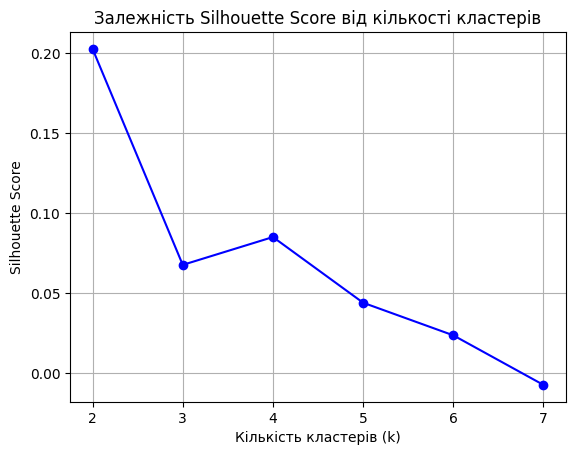

In [32]:
# Порожній список для зберігання значень Silhouette Score
wssse_values = []

# Ініціалізація ClusteringEvaluator
evaluator = ClusteringEvaluator(
    predictionCol='prediction',
    featuresCol='countvectorizer_Tweet',
    metricName='silhouette',
    distanceMeasure='squaredEuclidean'
)

# Цикл для різних значень k
for i in range(2, 8):  # k від 2 до 7
    KMeans_mod = KMeans(featuresCol='countvectorizer_Tweet', k=i)
    KMeans_fit = KMeans_mod.fit(dataset)
    output = KMeans_fit.transform(dataset)

    # Обчислення Silhouette Score
    score = evaluator.evaluate(output)
    wssse_values.append((i, score))  # Зберігаємо (k, score)

    print(f"Кількість кластерів: {i}, Silhouette Score: {score}")

# Виведення результатів
for k, score in wssse_values:
    print(f"Кількість кластерів: {k}, Silhouette Score: {score}")

# Побудова графіка
ks, scores = zip(*wssse_values)
plt.plot(ks, scores, marker='o', linestyle='-', color='b')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Silhouette Score')
plt.title('Залежність Silhouette Score від кількості кластерів')
plt.grid(True)
plt.show()

In [34]:
! pip install scikit-learn --quiet

In [35]:
from pyspark.sql.functions import col
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
# Створення моделі KMeans
K=5
kmeans = KMeans(k=K, featuresCol="countvectorizer_Tweet", predictionCol="prediction")
model = kmeans.fit(dataset)
predictions = model.transform(dataset)

24/12/07 09:41:36 WARN TaskSetManager: Stage 412 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:41:37 WARN TaskSetManager: Stage 415 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:41:37 WARN TaskSetManager: Stage 416 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:41:37 WARN TaskSetManager: Stage 417 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:41:38 WARN TaskSetManager: Stage 418 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:41:38 WARN TaskSetManager: Stage 419 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:41:38 WARN TaskSetManager: Stage 420 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.

In [37]:
score = evaluator.evaluate(predictions)
# Зберігаємо (k, score)

print(f"Кількість кластерів: {K}, Silhouette Score: {score}")

24/12/07 09:41:55 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
24/12/07 09:41:55 WARN TaskSetManager: Stage 466 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 09:41:56 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
24/12/07 09:41:56 WARN TaskSetManager: Stage 468 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.


Кількість кластерів: 5, Silhouette Score: 0.0439385589359011


In [38]:
predictions.show()

+--------------------+------------------+--------------------+----------------------+---------------------+---------------+----------+
|       OriginalTweet|         Sentiment|     tokenized_Tweet|stopwordsremoved_Tweet|countvectorizer_Tweet|Sentiment_label|prediction|
+--------------------+------------------+--------------------+----------------------+---------------------+---------------+----------+
|TRENDING: New Yor...|Extremely Negative|[trending:, new, ...|  [trending:, new, ...| (80942,[14,17,30,...|            4.0|         0|
|When I couldn't f...|          Positive|[when, i, couldn'...|  [when, couldn't, ...| (80942,[0,1,2,3,5...|            0.0|         1|
|Find out how you ...|Extremely Positive|[find, out, how, ...|  [find, out, how, ...| (80942,[4,20,33,3...|            3.0|         0|
| buying hits  Cit...|          Negative|[, buying, hits, ...|  [, buying, hits, ...| (80942,[0,14,30,6...|            1.0|         1|
|           One we...|           Neutral|[, , , , , , ,

24/12/07 09:41:59 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB
24/12/07 09:41:59 WARN TaskSetManager: Stage 471 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.


In [40]:
! pip install seaborn --quiet

In [41]:
import seaborn as sns

24/12/07 09:42:16 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB
24/12/07 09:42:16 WARN TaskSetManager: Stage 472 contains a task of very large size (1119 KiB). The maximum recommended task size is 1000 KiB.


[[5317 1877 3524  175 1476]
 [4599 1742 3480  165  972]
 [4437 1334 1880  227  454]
 [2616 1161 2104   83 1259]
 [2241 1034 2118   51  629]]


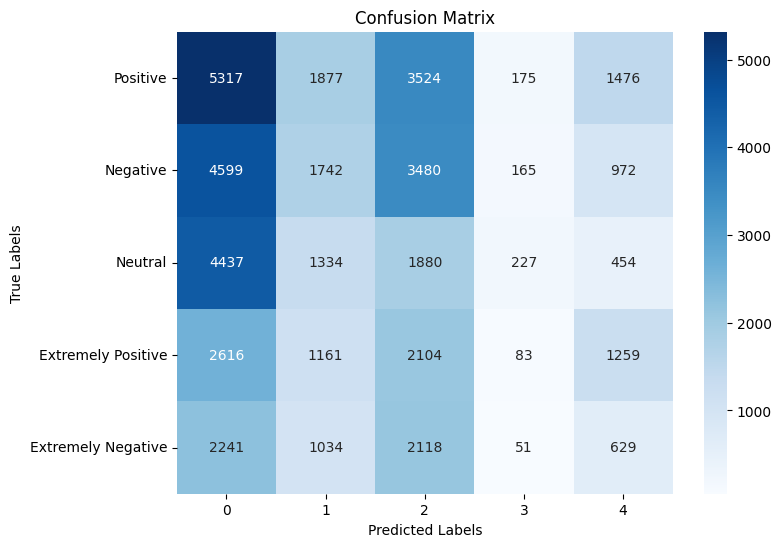

              precision    recall  f1-score   support

         0.0       0.28      0.43      0.34     12369
         1.0       0.24      0.16      0.19     10958
         2.0       0.14      0.23      0.18      8332
         3.0       0.12      0.01      0.02      7223
         4.0       0.13      0.10      0.12      6073

    accuracy                           0.21     44955
   macro avg       0.18      0.19      0.17     44955
weighted avg       0.20      0.21      0.19     44955



In [42]:
# Порівняння з відомими мітками (наприклад, 'true_labels')
true_labels = predictions.select("Sentiment_label", "prediction").toPandas()

# Обчислення Confusion Matrics
cm = confusion_matrix(true_labels['Sentiment_label'], true_labels['prediction'])
print(cm)

# Візуалізація за допомогою теплової карти
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",yticklabels=["Positive", "Negative","Neutral","Extremely Positive","Extremely Negative"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Додатково можна обчислити інші метрики
print(classification_report(true_labels['Sentiment_label'], true_labels['prediction']))

##__Самостійні завдання__

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP7.ipynb***



### Завдання №1

1. Інсталювати та імпортувати необхідні бібліотеки та модулі
2. Створити Spark Session








In [1]:
# МІСЦЕ ДЛЯ КОДУ
# імпорт допоміжної бібліотеки для організації правильного шляху до Spark
import findspark
findspark.init()
#імпорт бібліотек та модулів

import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

# Створення spark session

spark = SparkSession \
    .builder \
    .appName("My_Spark_Text_Сlassification_2") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g")\
    .config("spark.executor.cores", "4") \
    .config("spark.sql.shuffle.partitions", "200") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .config("spark.sql.autoBroadcastJoinThreshold", "-1")\
    .config("spark.driver.maxResultSize", "4g") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/07 13:50:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Завдання №2

* Завантажте фійл `text_data_med.csv` в локальне сховище
та застосуйте команду для зчитування файлу
`df = pd.read_csv('text_data_med.csv')`

Набір даних включає документи про рак, які класифікуються за 3 категоріями: «Рак щитовидної залози», «Рак товстої кишки», «Рак легенів».
Загальна кількість публікацій = 7569. у наборі даних є 3 мітки класів.

* перетворіть датасет у DataFrame PySpark
* перевірте на пропущені дані, при необхідності вилучіть порожні записи


In [2]:
# Використаємо `read_csv` з pandas для завантаження датасету
df = pd.read_csv('data/text_data_med.csv', encoding='latin-1')
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [3]:
#завантажимо дані в spark dataframe
df_cleaned = df.dropna()
tdf = spark.createDataFrame(df_cleaned)
tdf.show()

24/12/07 13:50:13 WARN TaskSetManager: Stage 0 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.


+----------+--------------+--------------------+
|Unnamed: 0|             0|                   a|
+----------+--------------+--------------------+
|         0|Thyroid_Cancer|Thyroid surgery i...|
|         1|Thyroid_Cancer|" The adopted str...|
|         2|Thyroid_Cancer|coronary arteryby...|
|         3|Thyroid_Cancer| Solitary plasmac...|
|         4|Thyroid_Cancer| This study aimed...|
|         5|Thyroid_Cancer| This study was p...|
|         6|Thyroid_Cancer| This study was p...|
|         7|Thyroid_Cancer|Journal of Intern...|
|         8|Thyroid_Cancer| Gastric cancer G...|
|         9|Thyroid_Cancer| Scars Burns  Hea...|
|        10|Thyroid_Cancer| In  a novel coro...|
|        11|Thyroid_Cancer| Cabozantinib is ...|
|        12|Thyroid_Cancer|" Despite several...|
|        13|Thyroid_Cancer| Purpose of Revie...|
|        14|Thyroid_Cancer|Neurologic Manife...|
|        15|Thyroid_Cancer|EndocrinesyPostop...|
|        16|Thyroid_Cancer|Neck Tissues A a0...|
|        17|Thyroid_

### Завдання №3
Виконайте:
* токенізацію
* вилучення стоп слів по замовчуванню та задопомогою створення власного списку стоп слів, щоб було видно видалення слів при виводі на екран
* перетворення у векторну форму
* використайте об'єднання цих команд `pipeline`


In [5]:
# МІСЦЕ ДЛЯ КОДУ
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml import Pipeline

# Токенізація тексту
tokenizer = Tokenizer(inputCol="a", outputCol="tokens")

# Створюємо власний список стоп-слів
custom_stop_words = ["the", "and", "is", "to", "of", "a", "in", "this", "was", "for"]

# Видалення стоп-слів за замовчуванням
default_stop_words_remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens_default")

# Видалення стоп-слів із використанням власного списку
custom_stop_words_remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens_custom", stopWords=custom_stop_words)

# Перетворення у векторну форму
vectorizer = CountVectorizer(inputCol="filtered_tokens_custom", outputCol="features")

# Об'єднання всіх етапів у pipeline
pipeline = Pipeline(stages=[tokenizer, 
                            default_stop_words_remover, 
                            custom_stop_words_remover, 
                            vectorizer])

# Тренуємо pipeline на даних
model = pipeline.fit(tdf)

# Застосовуємо pipeline до даних
processed_data = model.transform(tdf)

# Виводимо результати для перевірки
processed_data.select("tokens", "filtered_tokens_default", "filtered_tokens_custom", "features").show(truncate=False)

24/12/07 13:51:01 WARN TaskSetManager: Stage 1 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 13:51:12 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:51:12 WARN TaskSetManager: Stage 5 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Завдання №4
* Застосуйте алгоритм кластеризації `КMeans` до перетвореної векторної форми тексту
* визначить за правилом "ліктя" та оцінки оптимальну кількість кластерів
* зробіть висновки

24/12/07 13:52:09 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:52:09 WARN TaskSetManager: Stage 6 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 13:52:14 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:52:15 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:52:15 WARN TaskSetManager: Stage 9 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 13:52:20 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:52:20 WARN TaskSetManager: Stage 10 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 13:52:20 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:52:20 WARN TaskSetManager: Stage 11 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.


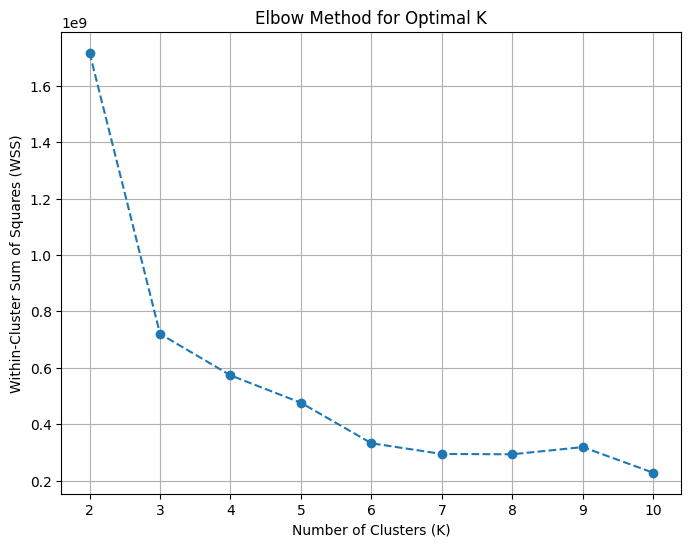

24/12/07 13:56:23 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:56:23 WARN TaskSetManager: Stage 306 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 13:56:27 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:56:28 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:56:28 WARN TaskSetManager: Stage 309 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 13:56:32 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:56:32 WARN TaskSetManager: Stage 310 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 13:56:32 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 13:56:32 WARN TaskSetManager: Stage 311 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000

Оптимальна кількість кластерів: 10
Silhouette Score для кластеризації: 0.46879691462053225


In [6]:
# МІСЦЕ ДЛЯ КОДУ
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt

# Витягаємо векторизовані дані
vector_data = processed_data.select("features")

# Функція для обчислення оцінки за правилом "ліктя"
def calculate_elbow_curve(data, max_clusters=10):
    wss = []  # Список для утримання сум квадратів відстаней (within-cluster sum of squares)
    for k in range(2, max_clusters + 1):
        kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
        model = kmeans.fit(data)
        wss.append(model.summary.trainingCost)
    return wss

# Обчислення оцінки за правилом "ліктя"
max_clusters = 10
wss = calculate_elbow_curve(vector_data, max_clusters=max_clusters)

# Візуалізація правила "ліктя"
plt.figure(figsize=(8, 6))
plt.plot(range(2, max_clusters + 1), wss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.grid()
plt.show()

# Вибір оптимальної кількості кластерів на основі "ліктя"
optimal_k = wss.index(min(wss)) + 2

# Кластеризація з оптимальною кількістю кластерів
kmeans = KMeans().setK(optimal_k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(vector_data)

# Прогнозування кластерів
clustered_data = model.transform(vector_data)

# Оцінка кластеризації
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(clustered_data)

# Висновки
print(f"Оптимальна кількість кластерів: {optimal_k}")
print(f"Silhouette Score для кластеризації: {silhouette_score}")

Висновки

За графіком можемо побачити, що реальна оптимальна кількість кластерів для даних становить 6 кластерів

### Завдання №5
* побудуйте модель для трьох кластерів
* побудуйте `Confusion Matrix` для наявних класів та визначених кластерів
* зробіть висновки про відповідность розподілу на кластери до існуючих класів


24/12/07 14:03:10 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 14:03:10 WARN TaskSetManager: Stage 370 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 14:03:15 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 14:03:15 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 14:03:15 WARN TaskSetManager: Stage 373 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 14:03:19 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 14:03:19 WARN TaskSetManager: Stage 374 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000 KiB.
24/12/07 14:03:20 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
24/12/07 14:03:20 WARN TaskSetManager: Stage 375 contains a task of very large size (20910 KiB). The maximum recommended task size is 1000

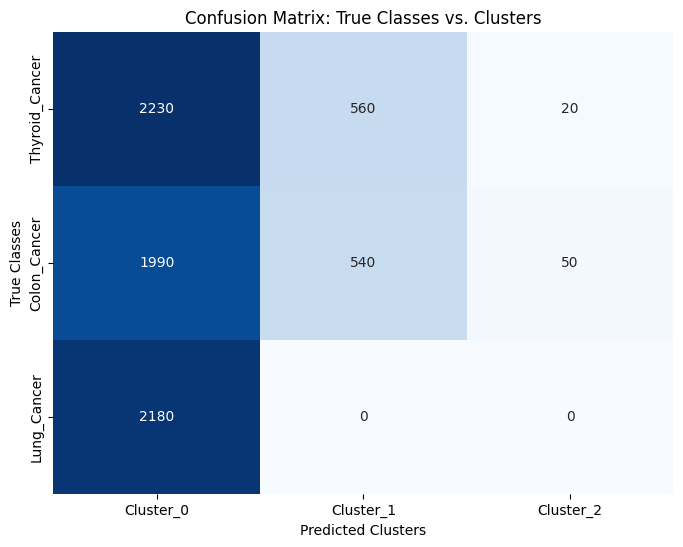

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.79      0.48      2810
           1       0.49      0.21      0.29      2580
           2       0.00      0.00      0.00      2180

    accuracy                           0.37      7570
   macro avg       0.28      0.33      0.26      7570
weighted avg       0.30      0.37      0.28      7570



In [ ]:
# МІСЦЕ ДЛЯ КОДУ
from pyspark.sql.functions import col, when
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Застосування моделі для трьох кластерів
kmeans_3 = KMeans().setK(3).setSeed(1).setFeaturesCol("features")
model_3 = kmeans_3.fit(vector_data)
clustered_data_3 = model_3.transform(processed_data)

label_mapping = {"Thyroid_Cancer": 0, "Colon_Cancer": 1, "Lung_Cancer": 2}
clustered_data_3 = clustered_data_3.withColumn("label", when(col("0") == "Thyroid_Cancer", 0)
                                               .when(col("0") == "Colon_Cancer", 1)
                                               .when(col("0") == "Lung_Cancer", 2))

clustered_df = clustered_data_3.select("label", "prediction").toPandas()

conf_matrix = confusion_matrix(clustered_df["label"], clustered_df["prediction"])

conf_df = pd.DataFrame(
    conf_matrix,
    index=["Thyroid_Cancer", "Colon_Cancer", "Lung_Cancer"],
    columns=["Cluster_0", "Cluster_1", "Cluster_2"]
)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix: True Classes vs. Clusters")
plt.ylabel("True Classes")
plt.xlabel("Predicted Clusters")
plt.show()

print("Classification Report:")
print(classification_report(clustered_df["label"], clustered_df["prediction"]))

Висновки:

Результати класифікаційного звіту показують, що алгоритм кластеризації краще ідентифікує перший клас (0) із точністю 35% і повнотою 79%, тоді як другий клас (1) має помірну точність (49%) і низьку повноту (21%). Третій клас (2) не був ефективно кластеризований, із нульовими показниками точності, повноти та F1-оцінки. Загальна точність моделі становить 37%, а середні зважені значення для F1-оцінки та точності – 28%. Це свідчить про значну неоднорідність у розподілі кластерів і необхідність покращення моделі.